In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint

# As the dataset is divided into folders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [56]:
w,h = 400,400
batch_size = 32

train_path = '/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/train'
test_path = '/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/test'
val_path = '/kaggle/input/chest-xray-pneumoniacovid19tuberculosis/val'

train_img_gen = ImageDataGenerator(
    rescale = 1.0/255,
    zoom_range=0.3
)

test_img_gen = ImageDataGenerator(
    rescale = 1.0/255
)

val_img_gen = ImageDataGenerator(
    rescale = 1.0/255
)

train_dataset = train_img_gen.flow_from_directory(
    train_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True
)

test_dataset = test_img_gen.flow_from_directory(
    test_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

val_dataset = val_img_gen.flow_from_directory(
    val_path,
    target_size = (w,h),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = False
)

Found 6326 images belonging to 4 classes.
Found 771 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [57]:
train_dataset.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}

(32, 400, 400, 3)


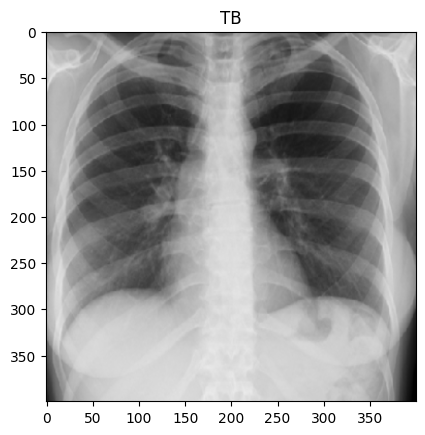

(32, 400, 400, 3)


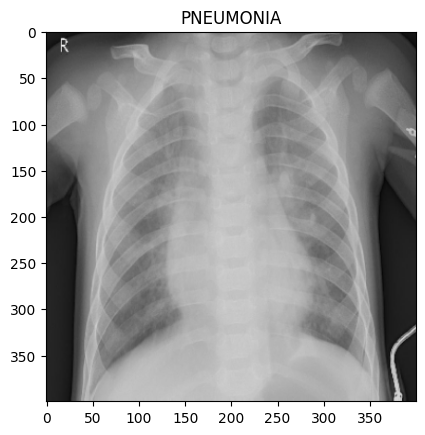

(32, 400, 400, 3)


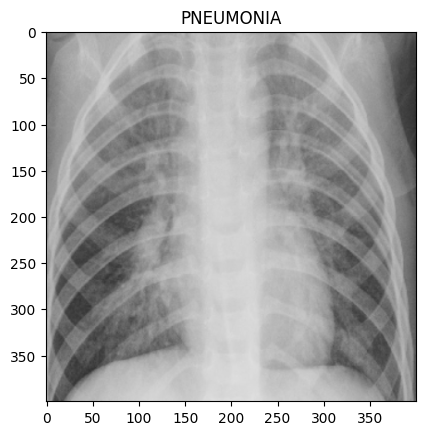

(32, 400, 400, 3)


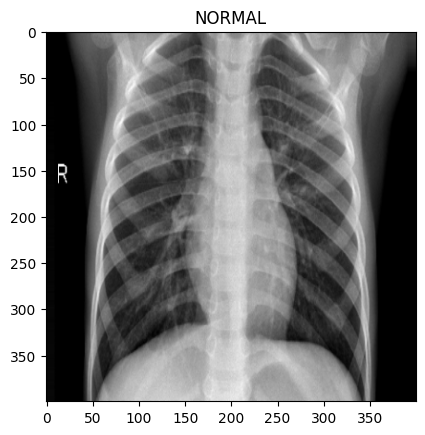

(32, 400, 400, 3)


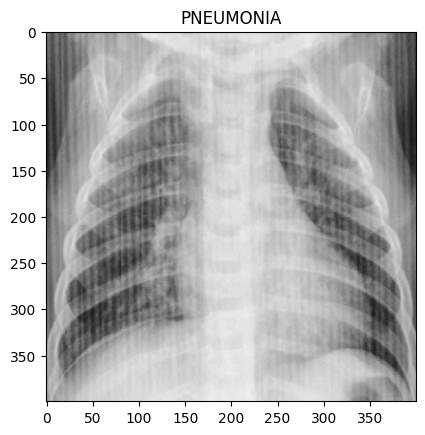

In [58]:
classes = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TB']

for _ in range(5):
    img, label = train_dataset.next()
    print(img.shape)
    plt.title(classes[np.argmax(label[0])])
    plt.imshow(img[0])
    plt.show()

In [59]:
train_dataset.image_shape

(400, 400, 3)

# Simple CNN

In [60]:
model = models.Sequential()

# # Convolutional layers
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(w, h, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# # Flatten layer
model.add(layers.Flatten())

# # Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))  # dropout to avoid overfitting
model.add(layers.Dense(4, activation='softmax'))  # softmax is used as it is a multiclass problem

# # Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Print a summary of the model architecture
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 398, 398, 64)      1792      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 199, 199, 64)      0         
 ng2D)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 2534464)           0         
                                                                 
 dense_18 (Dense)            (None, 128)               324411520 
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 4)                 516       
                                                     

# Deep CNN

In [61]:
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(w, h, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten layer
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # dropout to avoid overfitting
model.add(layers.Dense(4, activation='softmax'))  # softmax is used as it is a multiclass problem

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 398, 398, 64)      1792      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 199, 199, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_6 (Conv2D)           (None, 197, 197, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 98, 98, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 48, 48, 128)     

In [62]:
resnetModel = models.Sequential()

ResNet_101_V2 = tf.keras.applications.ResNet101V2(
                include_top = False,
                weights="imagenet",
                input_shape=(w,h,3),
                pooling='max',
                classes=4
            )

for layer in ResNet_101_V2.layers:
    layer.trainable = False

resnetModel.add(ResNet_101_V2)
resnetModel.add(layers.Flatten())
resnetModel.add(layers.Dense(2048, activation='relu'))
resnetModel.add(layers.Dense(1048, activation='relu'))
resnetModel.add(layers.Dense(512, activation='relu'))
resnetModel.add(layers.Dense(256, activation='relu'))
resnetModel.add(layers.Dense(128, activation='relu'))
resnetModel.add(layers.Dense(4, activation='softmax'))  # softmax is used as it is a multiclass problem

# Compile the model
resnetModel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

resnetModel.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 2048)              42626560  
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_22 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_23 (Dense)            (None, 1048)              2147352   
                                                                 
 dense_24 (Dense)            (None, 512)               537088    
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)             

In [63]:
weight_path = '/kaggle/working/'

model_checkpoint = ModelCheckpoint(
    filepath = weight_path,
    save_best_only = True,
    save_weights_only = True,
    mode = 'max',
    monitor = 'val_accuracy'
) 

In [64]:
history = resnetModel.fit(train_dataset, epochs=15, validation_data=val_dataset, callbacks=[model_checkpoint])

Epoch 1/15
198/198 [==============================] - 267s 1s/step - loss: 1.3569 - accuracy: 0.7913 - val_loss: 0.4132 - val_accuracy: 0.8421
Epoch 2/15
198/198 [==============================] - 254s 1s/step - loss: 0.2216 - accuracy: 0.9172 - val_loss: 0.3958 - val_accuracy: 0.8684
Epoch 3/15
198/198 [==============================] - 252s 1s/step - loss: 0.1946 - accuracy: 0.9265 - val_loss: 0.2931 - val_accuracy: 0.8684
Epoch 4/15
198/198 [==============================] - 253s 1s/step - loss: 0.1877 - accuracy: 0.9289 - val_loss: 0.4247 - val_accuracy: 0.8947
Epoch 5/15
198/198 [==============================] - 253s 1s/step - loss: 0.1824 - accuracy: 0.9328 - val_loss: 0.4383 - val_accuracy: 0.8421
Epoch 6/15
198/198 [==============================] - 251s 1s/step - loss: 0.1490 - accuracy: 0.9464 - val_loss: 0.3310 - val_accuracy: 0.8684
Epoch 7/15
198/198 [==============================] - 255s 1s/step - loss: 0.1377 - accuracy: 0.9507 - val_loss: 0.4127 - val_accuracy: 0.8684

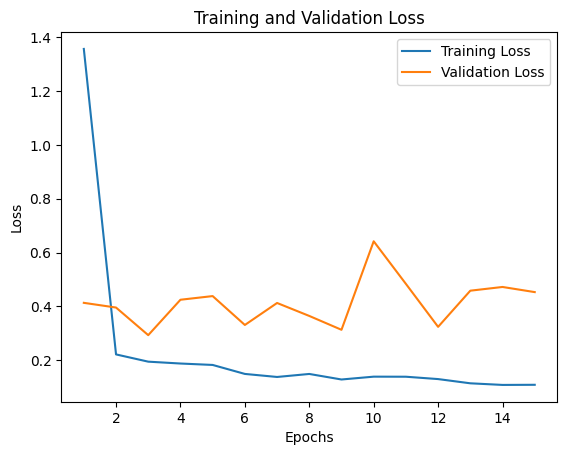

In [66]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(history.history['loss'])
# Plot the loss and val_loss
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [67]:
# load best weights to model
resnetModel.load_weights(weight_path)

# make predictions
predictions = resnetModel.predict(test_dataset)
predictions

25/25 [==============================] - 15s 485ms/step


array([[9.96267617e-01, 2.21406389e-03, 1.48290535e-03, 3.54434524e-05],
       [9.88252461e-01, 4.49101301e-03, 7.18474016e-03, 7.18047231e-05],
       [9.90812361e-01, 6.59709238e-03, 2.40437314e-03, 1.86149729e-04],
       ...,
       [1.76524668e-06, 6.03943429e-09, 2.35543823e-07, 9.99997973e-01],
       [3.26896494e-04, 5.09161600e-06, 1.06128355e-04, 9.99561846e-01],
       [5.50454832e-04, 2.91004972e-06, 1.95294764e-04, 9.99251425e-01]],
      dtype=float32)

In [68]:
# we have to get the position of the maximum value from each sample.

predicted_class = np.argmax(predictions, axis=1)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       106
           1       0.92      0.64      0.75       234
           2       0.81      0.97      0.88       390
           3       0.97      0.90      0.94        41

    accuracy                           0.86       771
   macro avg       0.92      0.86      0.88       771
weighted avg       0.87      0.86      0.85       771

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2, 'TURBERCULOSIS': 3}


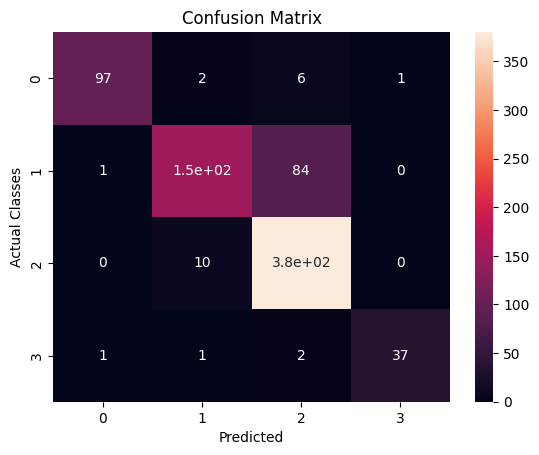

In [69]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_dataset.classes

sns.heatmap(confusion_matrix(true_labels, predicted_class), annot=True)

# Print classification report
print(classification_report(true_labels, predicted_class))
print(test_dataset.class_indices)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual Classes')
plt.show()

In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Predict Output
STEP_SIZE_TEST = test_dataset.n//test_dataset.batch_size
test_dataset.reset()
pred=model.predict(test_dataset,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_dataset.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

24/24 [==============================] - 12s 447ms/step


In [71]:
current_idx = 0
count_accurate= 0
Actual = []
for i in predictions:
    string = test_dataset.filenames[current_idx]
    substr = '/'
    actual = string[:string.find(substr)]
    Actual.append(actual)
    pred = predictions[current_idx]
    if actual == pred: 
        count_accurate += 1
    current_idx +=1
acc = count_accurate/771
print(f"The accuracy on predicted the test images is {round(acc*100,2)}%.")

The accuracy on predicted the test images is 52.01%.


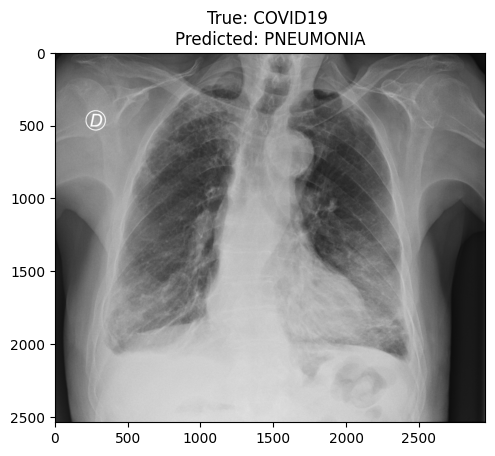

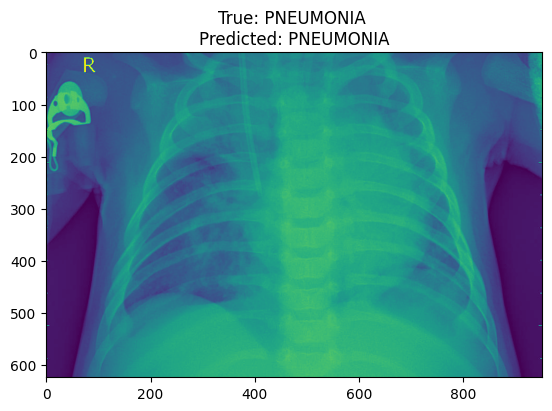

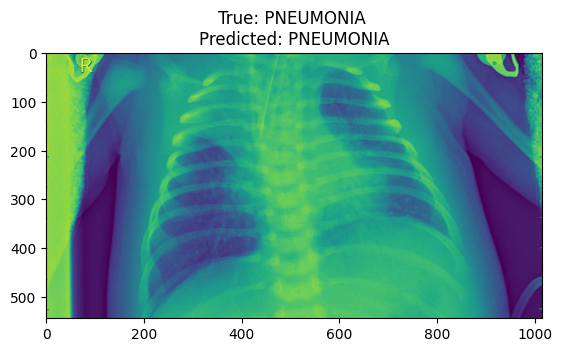

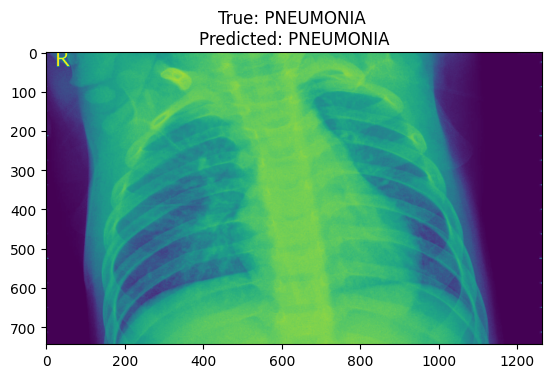

In [72]:
current = [22,345,667,555]
path = '../input/chest-xray-pneumoniacovid19tuberculosis/'
for i in current: 
    plt.imshow(plt.imread(path+'test/'+test_dataset.filenames[i]))
    string = test_dataset.filenames[i]
    substr = '/'
    actual = string[:string.find(substr)]
    plt.title(f"True: {actual} \nPredicted: {predictions[i]}")
    plt.show()

In [74]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk
